In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('ECOMM DATA.xlsx')
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.570,Critical
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.630,Critical
2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.490,Medium
3,13524,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.160,Medium
4,47221,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.040,Critical
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,29002,IN-2014-62366,2014-06-19,2014-06-19,Same Day,KE-16420,Katrina Edelman,Corporate,Kure,Hiroshima,...,OFF-FA-10000746,Office Supplies,Fasteners,"Advantus Thumb Tacks, 12 Pack",65.100,5,0.0,4.5000,0.010,Medium
51286,35398,US-2014-102288,2014-06-20,2014-06-24,Standard Class,ZC-21910,Zuschuss Carroll,Consumer,Houston,Texas,...,OFF-AP-10002906,Office Supplies,Appliances,Hoover Replacement Belt for Commercial Guardsm...,0.444,1,0.8,-1.1100,0.010,Medium
51287,40470,US-2013-155768,2013-12-02,2013-12-02,Same Day,LB-16795,Laurel Beltran,Home Office,Oxnard,California,...,OFF-EN-10001219,Office Supplies,Envelopes,"#10- 4 1/8"" x 9 1/2"" Security-Tint Envelopes",22.920,3,0.0,11.2308,0.010,High
51288,9596,MX-2012-140767,2012-02-18,2012-02-22,Standard Class,RB-19795,Ross Baird,Home Office,Valinhos,São Paulo,...,OFF-BI-10000806,Office Supplies,Binders,"Acco Index Tab, Economy",13.440,2,0.0,2.4000,0.003,Medium


In [3]:
# 1.total sales
total_sales = df['Sales'].sum()
print(f"\nTotal Sales: ${total_sales:,.2f}")


Total Sales: $12,642,501.91


In [4]:
# 2. Analyze sales trends over time
# Convert 'Order Date' to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [5]:
# Extract year and month from 'Order Date'
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month

In [6]:
# Group by year and month and compute total sales
monthly_sales = df.groupby(['Year', 'Month'])['Sales'].sum().reset_index()

In [7]:
# Create a date column for easier plotting
monthly_sales['Date'] = pd.to_datetime(monthly_sales[['Year', 'Month']].assign(Day=1))

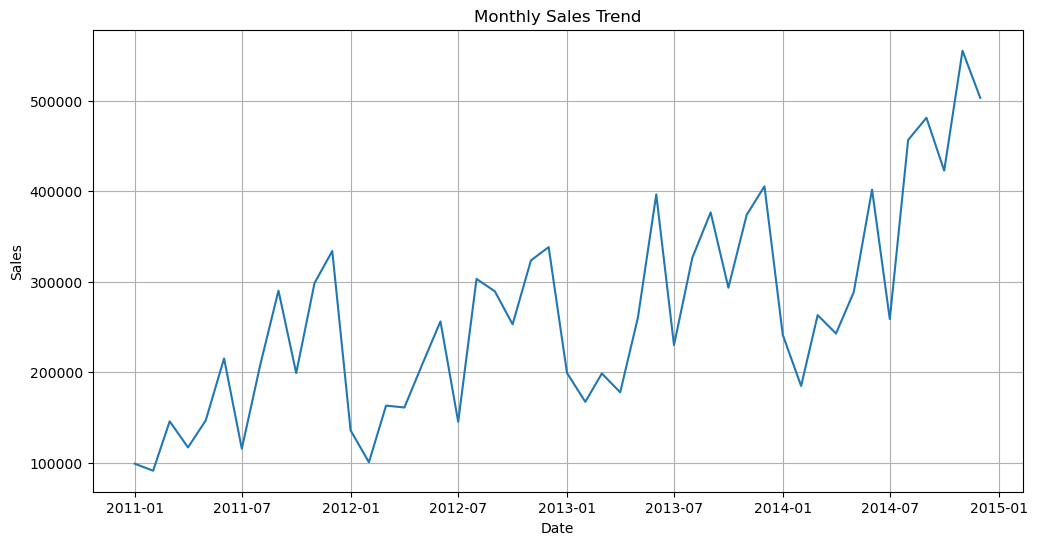

In [8]:
# Plot sales trends over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='Date', y='Sales')
plt.title('Monthly Sales Trend')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

In [9]:
# 3. Determine the best-selling products
best_selling_products = df.groupby('Product Name')['Sales'].sum().reset_index().sort_values(by='Sales', ascending=False)

In [10]:
# Display top 10 best-selling products
print("\nTop 10 Best-Selling Products:")
print(best_selling_products.head(10))


Top 10 Best-Selling Products:
                                           Product Name       Sales
310                        Apple Smart Phone, Full Size  86935.7786
970                        Cisco Smart Phone, Full Size  76441.5306
2415                    Motorola Smart Phone, Full Size  73156.3030
2501                       Nokia Smart Phone, Full Size  71904.5555
866               Canon imageCLASS 2200 Advanced Copier  61599.8240
1837         Hon Executive Leather Armchair, Adjustable  58193.4841
2631  Office Star Executive Leather Armchair, Adjust...  50661.6840
1714  Harbour Creations Executive Leather Armchair, ...  50121.5160
2988                      Samsung Smart Phone, Cordless  48653.4600
2502                  Nokia Smart Phone, with Caller ID  47877.7857


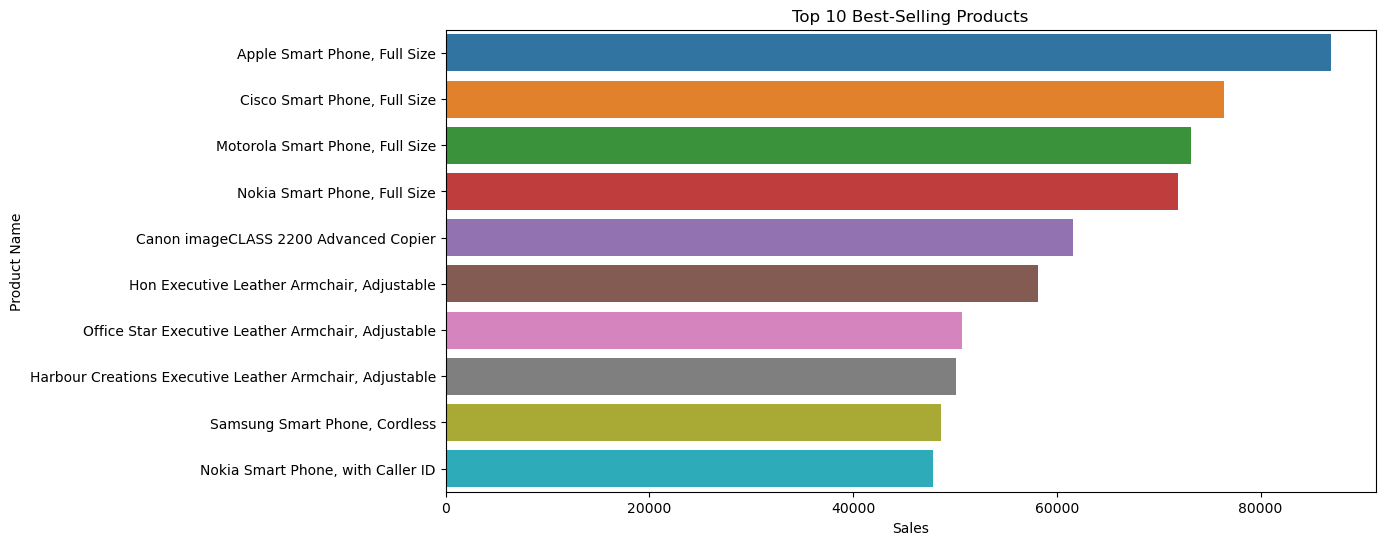

In [11]:
# Plot top 10 best-selling products
plt.figure(figsize=(12, 6))
sns.barplot(data=best_selling_products.head(10), x='Sales', y='Product Name')
plt.title('Top 10 Best-Selling Products')
plt.xlabel('Sales')
plt.ylabel('Product Name')
plt.show()

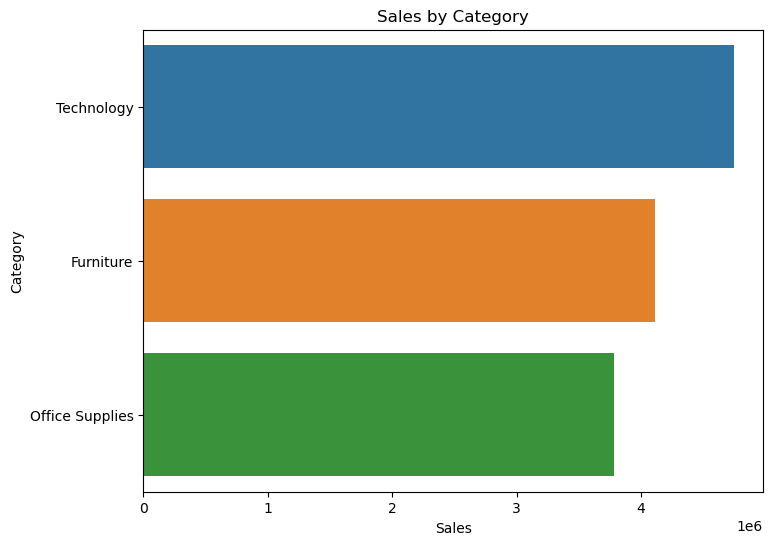

In [12]:
# Sales by category
category_sales = df.groupby('Category')['Sales'].sum().reset_index().sort_values(by='Sales', ascending=False)
plt.figure(figsize=(8, 6))
sns.barplot(data=category_sales, x='Sales', y='Category')
plt.title('Sales by Category')
plt.xlabel('Sales')
plt.ylabel('Category')
plt.show()

In [13]:
# Sales by region
region_sales = df.groupby('Region')['Sales'].sum().reset_index().sort_values(by='Sales', ascending=False)

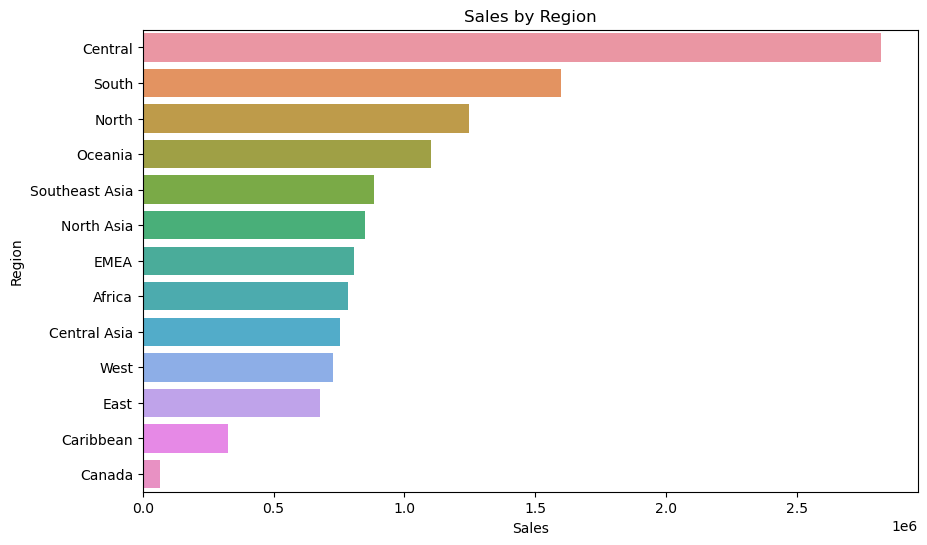

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=region_sales, x='Sales', y='Region')
plt.title('Sales by Region')
plt.xlabel('Sales')
plt.ylabel('Region')
plt.show()